## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

DONE

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

INFO: Finished 7-process extraction of 1067922 articles in 1053.4s (1013.8 art/s)
INFO: total of page: 2416224, total of articl page: 1067922; total of used articl page: 1067922

DONE

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [40]:
def wikilist():
    f = open('wiki_00')
    lis = []
    while True: 
        line = f.readline() 
        lis.append(line)

        if not line: 
            break
    f.close()
    return lis

In [41]:
def stopwordslist():
    f_sw = open('停用词.txt')
    lis_sw = []
    while True:
        line = f_sw.readline()
        lis_sw.append(line.strip())

        if not line:
            break
    f_sw.close()
    return lis_sw

In [42]:
import jieba

def cutword(line):
    seg_list = jieba.cut(line, cut_all=False)
    seg_list = " ".join(seg_list)
    return seg_list.split()

In [43]:
def processing():

    print("Creating a list of stopwords...")
    sw = stopwordslist()
    
    print("Loading a file of wiki...")
    wiki = wikilist()
    
    out = ""
    for line in wiki:
        li = cutword(line)
        for w in li:
            if w not in sw and w != '\t':
                out += w
                out += ' '
    return out

In [44]:
out = processing()
f_out = open('wiki_00_cut.txt', 'w')
f_out.write(out)
f_out.close()

Creating a list of stopwords...
Loading a file of wiki...


## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

### 只选取了其中一个wiki文件来训练word2vec模型

In [1]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [2]:
sentences = 'wiki_00_cut.txt'
w2v_model = 'w2v_model'
model = Word2Vec(LineSentence(sentences), size=100, window=5, min_count=5, sg=0, hs=1)
model.save(w2v_model)

In [3]:
for key in model.wv.similar_by_word('计算机',topn=10):
    print(key[0],key[1])

系统 0.9881471991539001
运行 0.9734936356544495
学科 0.9631261825561523
oops 0.9613467454910278
计算 0.9604191780090332
领域 0.9592621326446533
简单 0.9592247009277344
软件 0.9574362635612488
Smalltalk 0.9558756947517395
计算机科学 0.9552733302116394


## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

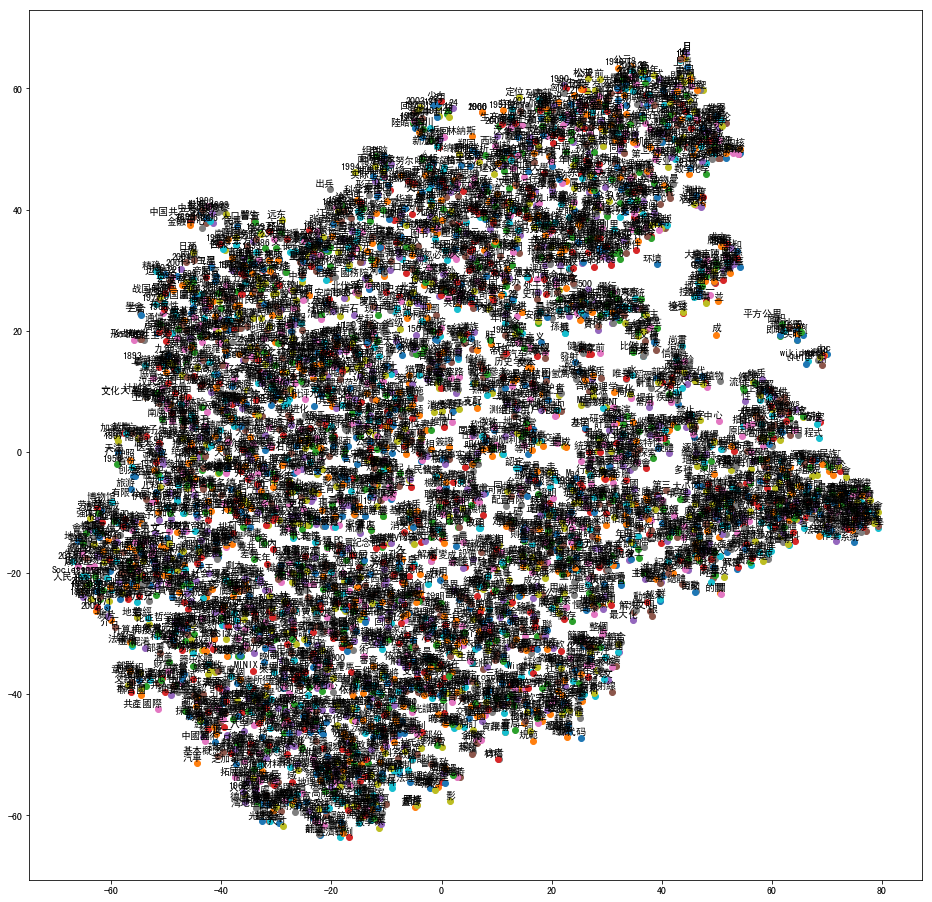

In [10]:
tsne_plot(model)

只选取了一个1M文件训练的word2vec模型，可视化就是出现黑乎乎一团，是因为min_count设置得还不够高吗？

另外，繁体字没有转汉字。